In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer

In [2]:
df = pd.read_excel('F:/Context_Aware_Data_Cleaning_Deep/UBMEC/Dataset/UBMEC.xlsx')

In [3]:
df.head

<bound method NDFrame.head of                                                     text   classes
0      এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...       joy
1      ২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...  surprise
2      বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক "কোথাও কেউ...       joy
3      এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...       joy
4      কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...  surprise
...                                                  ...       ...
13431  Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...       joy
13432  কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...       joy
13433  আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...       joy
13434          এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।       joy
13435  দুর্নীতি মুক্ত হলে নিশ্চয় চোরও মুক্ত হবে, বিশ্...       joy

[13436 rows x 2 columns]>

In [4]:
df.groupby("classes").describe()

text                                                               
         count unique                                                top freq
classes                                                                      
anger     2480   2422  নাস্তিকদের দালাল একাওর টিভি বন্ধ করা হোক,https...    6
disgust   2079   2049  অপরাধ কারী এবং অপরাধী কে প্রশ্রয় দানকারী দুজন...    6
fear      1361   1348  হট্রগোল আর পরিস্থিতি ঘোলাটে করে নির্বাহী মেজিস...    2
joy       3467   3290                                            ধন্যবাদ   27
sadness   2683   2622  অপরাধ কারী এবং অপরাধী কে প্রশ্রয় দানকারী দুজন...   12
surprise  1366   1341  আমরা কি স্ট্যাটাসের বাকি লাইনগুলো অস্বীকার করব...    4

In [5]:
df['text'] = df['text'].astype(str)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [7]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [8]:
df.columns

Index(['text', 'classes'], dtype='object')

In [9]:
df.head

<bound method NDFrame.head of                                                     text   classes
0      এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...       joy
1      ২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...  surprise
2      বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক "কোথাও কেউ...       joy
3      এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...       joy
4      কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...  surprise
...                                                  ...       ...
13431  Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...       joy
13432  কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...       joy
13433  আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...       joy
13434          এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।       joy
13435  দুর্নীতি মুক্ত হলে নিশ্চয় চোরও মুক্ত হবে, বিশ্...       joy

[13436 rows x 2 columns]>

In [10]:
def rem_symbol_punct(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', text)


def remove_html_and_urls(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text_without_html = soup.get_text()

    # Remove URLs
    text_without_urls = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text_without_html)

    return text_without_urls


def remove_emojis(text):
    # Emoji patterns for different Unicode ranges
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alphanumeric Supplement
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbat symbols
        "\U000024C2-\U0001F251" 
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r'', text)


#remove noise
def Remove_text(text):
    text = rem_symbol_punct(text)
    text = remove_html_and_urls(text)
    text = remove_emojis(text)
    return text

In [11]:
df['text'] = df['text'].apply(Remove_text)

In [12]:
longest_string = max(df["text"], key=len)
print(len(longest_string))

3419


In [13]:
# Instantiate the NLTKTokenizer
bnltk = NLTKTokenizer()


def remove_stopwords(text):
    # Get the list of Bengali stopwords
    bengali_stopwords = corpus.stopwords
    
    # Tokenize the Bengali text using NLTKTokenizer
    word_tokens = bnltk.word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [token for token in word_tokens if token not in bengali_stopwords]
    
    # Join the filtered tokens back into a text
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

In [14]:
df["text"] = df["text"].apply(remove_stopwords)

In [15]:
def apply_bangla_stemming(text):
    stmr = stemmer.BanglaStemmer()
    word_tokens = bnltk.word_tokenize(text)
    stemmed_words = [stmr.stem(word) for word in word_tokens]
    return ' '.join(stemmed_words)

In [16]:
df["text"] = df["text"].apply(apply_bangla_stemming)

applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
app

In [17]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["classes_bin"] = lb_make.fit_transform(df["classes"])
df[["classes_bin", "classes"]].head(11)

,classes_bin,classes
0,3,joy
1,5,surprise
2,3,joy
3,3,joy
4,5,surprise
5,3,joy
6,3,joy
7,4,sadness
8,3,joy
9,3,joy


In [18]:
df

,text,classes,classes_bin
0,নাটক ১৯৯৩ সাল ইউটিউব ছিলোনা ইউটিউব আবিষ্ক ২০০৫...,joy,3
1,২০২১ সালে “ কোথা ” আসে রুচির প্রশংসা পারছি,surprise,5
2,বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক কোথা,joy,3
3,এত সুন্দর নাটক কখনো সালে দেখ কয়েকব চোখ জল রাখ ...,joy,3
4,কখনো চিন্তা করিনি জন্ম ৭৮ বছর আগ নাটক দেখবো ভা...,surprise,5
...,...,...,...
13431,Bravo বললে ছোট ৷ হাজারো সাল আজক Hero,joy,3
13432,ম্যাজিস্ট্রেট স্য প্রথমটুক পড়ে ভাব বেচা পটল তুল,joy,3
13433,আপনা সত্য পথে অবিচল থাকুন দেশবাসী আপনা সর্বাত্...,joy,3
13434,এগা আপনা দিকে তাকা বাংলাদেশ,joy,3


In [19]:
df.isnull()

,text,classes,classes_bin
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
13431,False,False,False
13432,False,False,False
13433,False,False,False
13434,False,False,False


In [20]:
df.dropna(inplace=True)

In [21]:
df

,text,classes,classes_bin
0,নাটক ১৯৯৩ সাল ইউটিউব ছিলোনা ইউটিউব আবিষ্ক ২০০৫...,joy,3
1,২০২১ সালে “ কোথা ” আসে রুচির প্রশংসা পারছি,surprise,5
2,বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক কোথা,joy,3
3,এত সুন্দর নাটক কখনো সালে দেখ কয়েকব চোখ জল রাখ ...,joy,3
4,কখনো চিন্তা করিনি জন্ম ৭৮ বছর আগ নাটক দেখবো ভা...,surprise,5
...,...,...,...
13431,Bravo বললে ছোট ৷ হাজারো সাল আজক Hero,joy,3
13432,ম্যাজিস্ট্রেট স্য প্রথমটুক পড়ে ভাব বেচা পটল তুল,joy,3
13433,আপনা সত্য পথে অবিচল থাকুন দেশবাসী আপনা সর্বাত্...,joy,3
13434,এগা আপনা দিকে তাকা বাংলাদেশ,joy,3


In [22]:
text = df['text'].values.tolist()

In [23]:
df.groupby("classes").describe()

classes_bin                                   
               count mean  std  min  25%  50%  75%  max
classes                                                
anger         2480.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
disgust       2079.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
fear          1361.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
joy           3467.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0
sadness       2683.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0
surprise      1366.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0

In [24]:
df["classes"].value_counts()

joy         3467
sadness     2683
anger       2480
disgust     2079
surprise    1366
fear        1361
Name: classes, dtype: int64

In [25]:
longest_string = max(df["text"], key=len)
print(len(longest_string))

2792


In [26]:
text = df["text"]

In [27]:
train_counts = count_vect.fit_transform(text) # converting docs into vectors
train_tfidf  = train_counts 
train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(13436, 5061)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, df['classes_bin'], test_size=0.2, random_state=42)

Y_pre = df['classes']
target_names = list(set(Y_pre))

In [30]:
target_names

['surprise', 'joy', 'disgust', 'sadness', 'anger', 'fear']

In [31]:
X_train

<10748x5061 sparse matrix of type '<class 'numpy.float64'>'
	with 73367 stored elements in Compressed Sparse Row format>

In [32]:
y_train

1501     3
11407    5
2777     4
10943    0
8387     2
        ..
5191     2
13418    3
5390     4
860      2
7270     4
Name: classes_bin, Length: 10748, dtype: int32

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV 

In [34]:
import seaborn as sn

# Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB

Test set accuracy 0.3820684523809524
              precision    recall  f1-score   support

    surprise       0.39      0.26      0.31       491
         joy       0.30      0.06      0.10       416
     disgust       0.78      0.27      0.40       275
     sadness       0.38      0.83      0.52       674
       anger       0.33      0.42      0.37       541
        fear       0.62      0.04      0.08       291

    accuracy                           0.38      2688
   macro avg       0.47      0.31      0.30      2688
weighted avg       0.43      0.38      0.33      2688



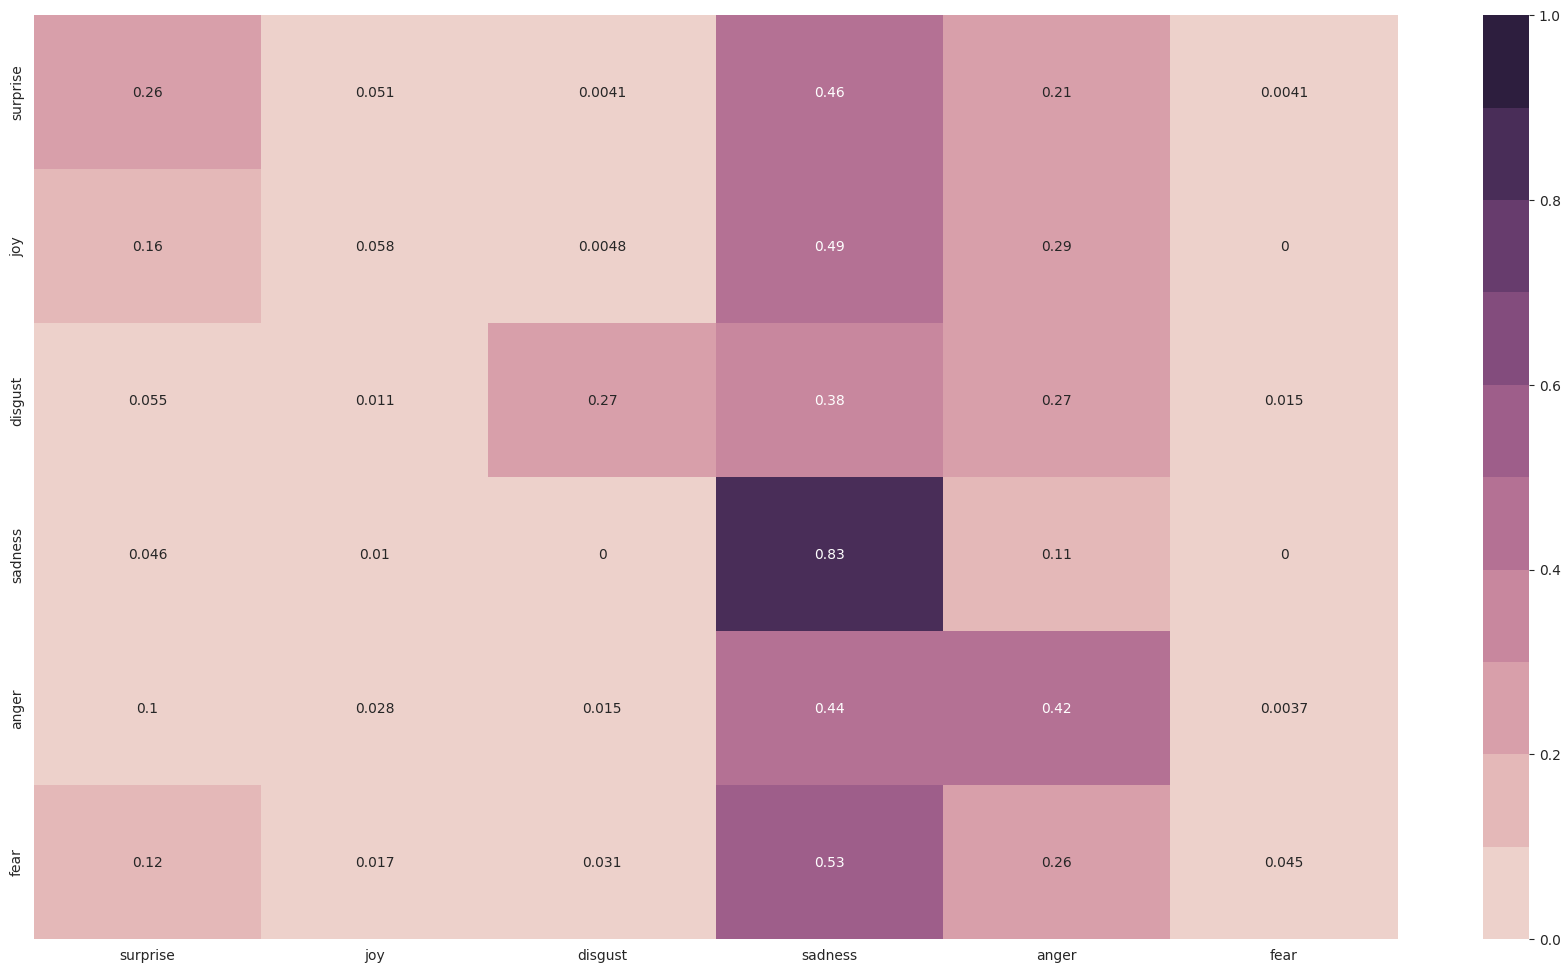

In [36]:
NBclassifer = MultinomialNB()
NBclassifer.fit(X_train, y_train)
y_pred = NBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)


# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [37]:
NBclassifer.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

# Support Vector Machine

In [38]:
from sklearn.svm import SVC


Test set accuracy 0.42299107142857145
              precision    recall  f1-score   support

    surprise       0.35      0.37      0.36       491
         joy       0.31      0.19      0.23       416
     disgust       0.74      0.41      0.53       275
     sadness       0.47      0.67      0.56       674
       anger       0.36      0.46      0.40       541
        fear       0.63      0.21      0.31       291

    accuracy                           0.42      2688
   macro avg       0.48      0.39      0.40      2688
weighted avg       0.44      0.42      0.41      2688



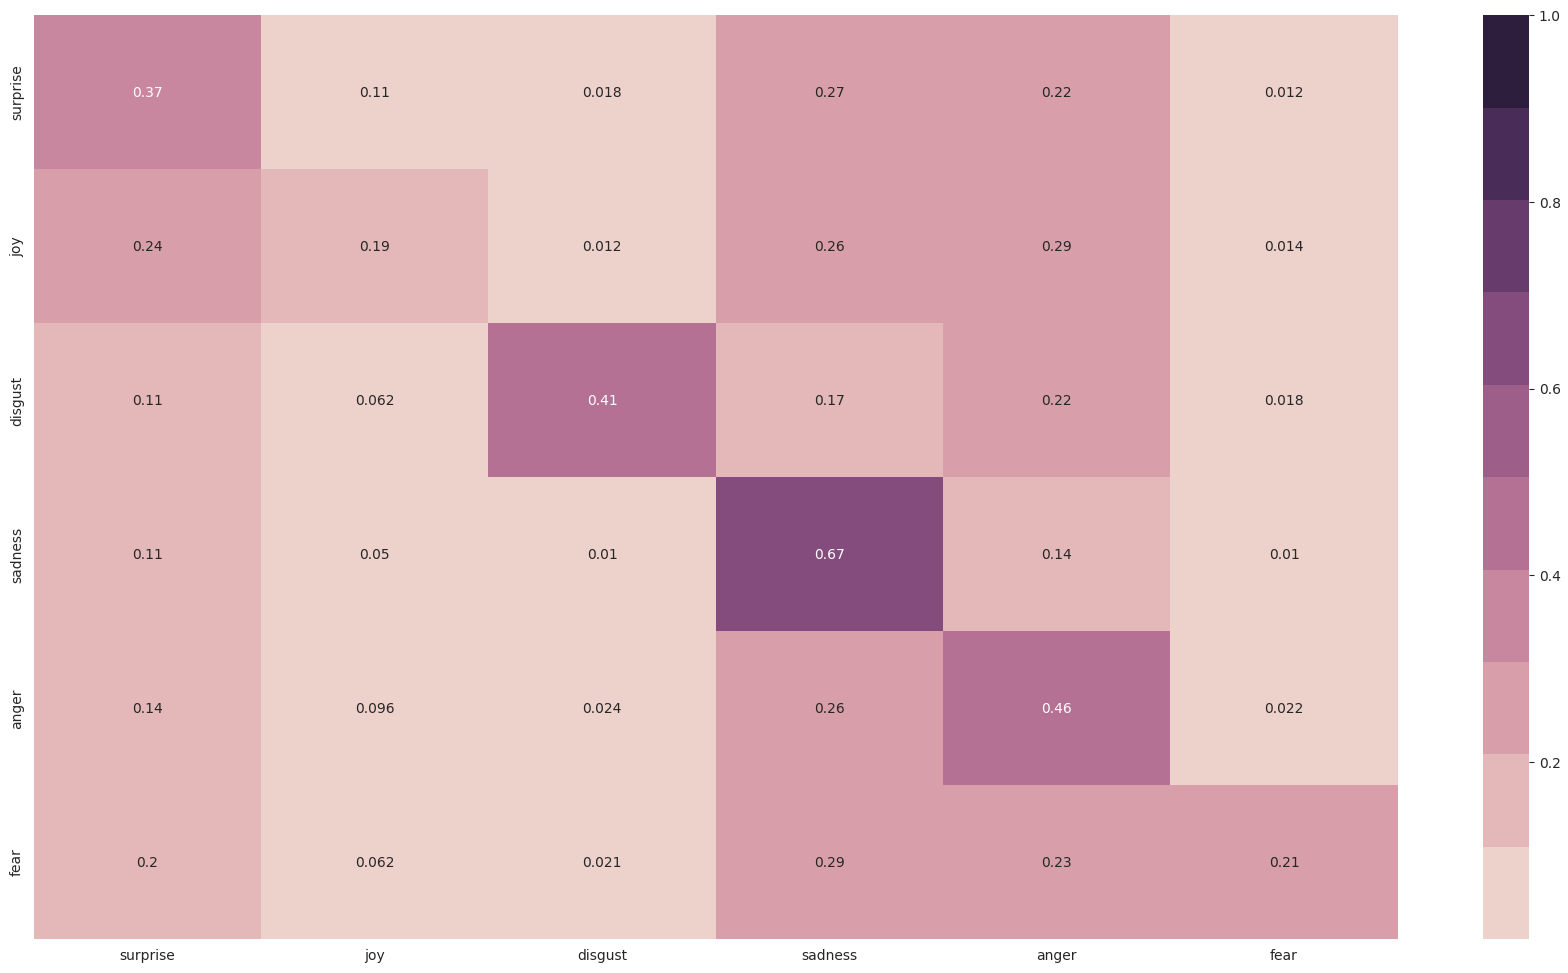

In [39]:
SVMclassifer = SVC()
SVMclassifer.fit(X_train, y_train)
y_pred = SVMclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

# XGBoost

In [40]:
from xgboost import XGBClassifier

Test set accuracy 0.40476190476190477
              precision    recall  f1-score   support

    surprise       0.32      0.33      0.32       491
         joy       0.28      0.15      0.20       416
     disgust       0.69      0.45      0.55       275
     sadness       0.43      0.70      0.53       674
       anger       0.36      0.36      0.36       541
        fear       0.53      0.24      0.33       291

    accuracy                           0.40      2688
   macro avg       0.43      0.37      0.38      2688
weighted avg       0.41      0.40      0.39      2688



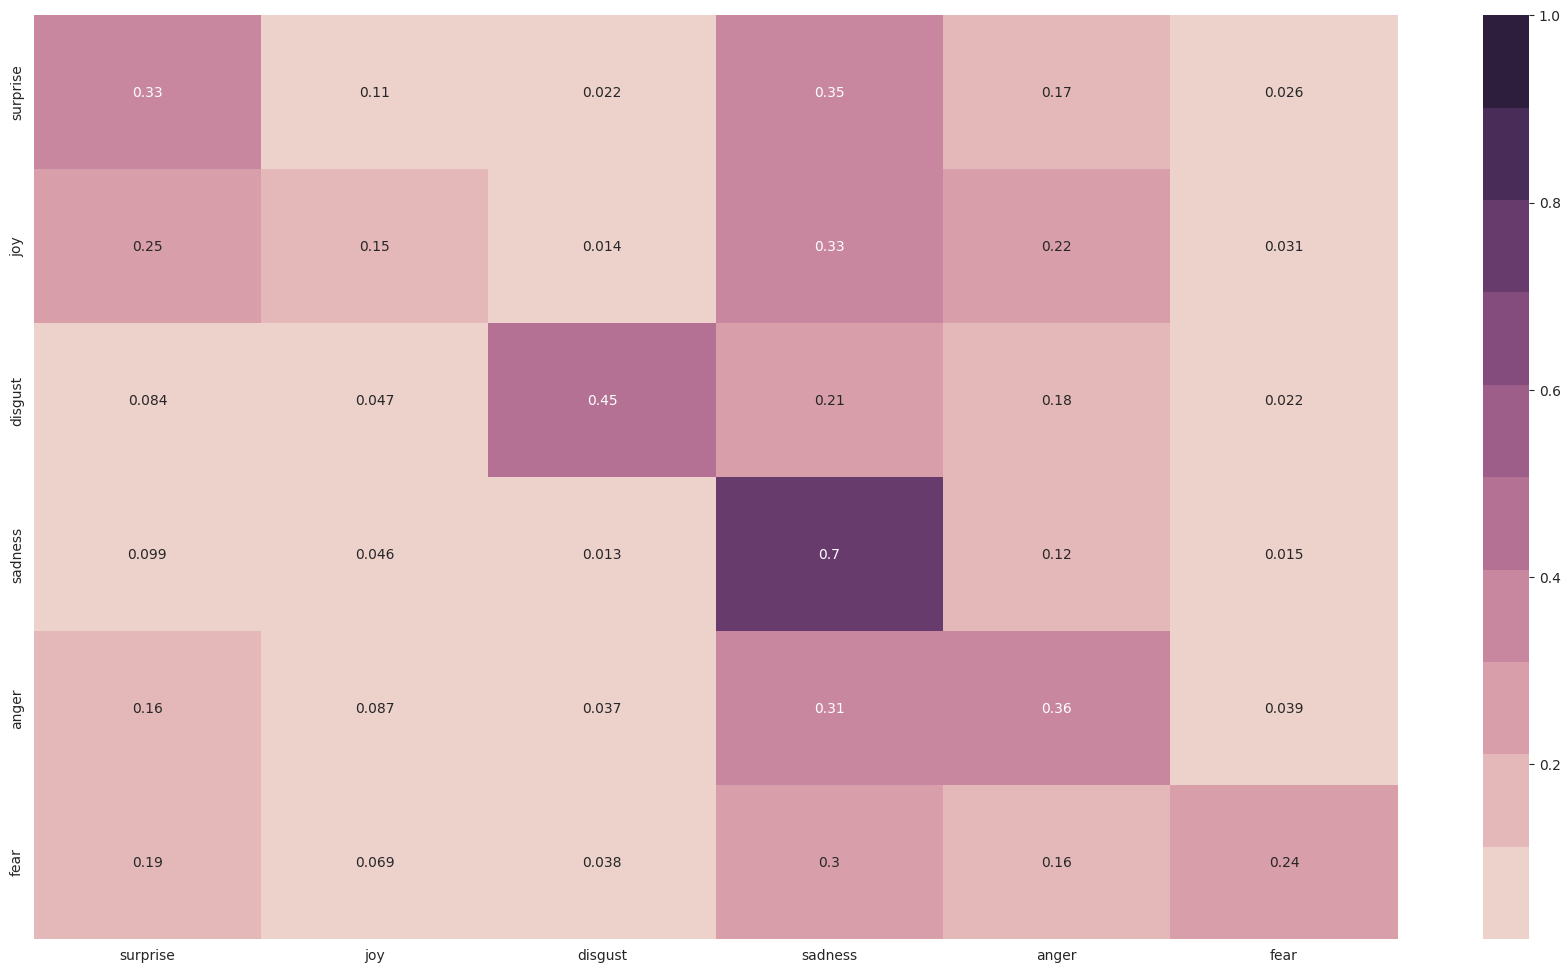

In [41]:
XGBclassifer = XGBClassifier()
XGBclassifer.fit(X_train, y_train)
y_pred = XGBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.42001488095238093
              precision    recall  f1-score   support

    surprise       0.34      0.34      0.34       491
         joy       0.31      0.17      0.22       416
     disgust       0.65      0.45      0.53       275
     sadness       0.45      0.72      0.56       674
       anger       0.36      0.39      0.38       541
        fear       0.53      0.25      0.34       291

    accuracy                           0.42      2688
   macro avg       0.44      0.39      0.39      2688
weighted avg       0.42      0.42      0.40      2688



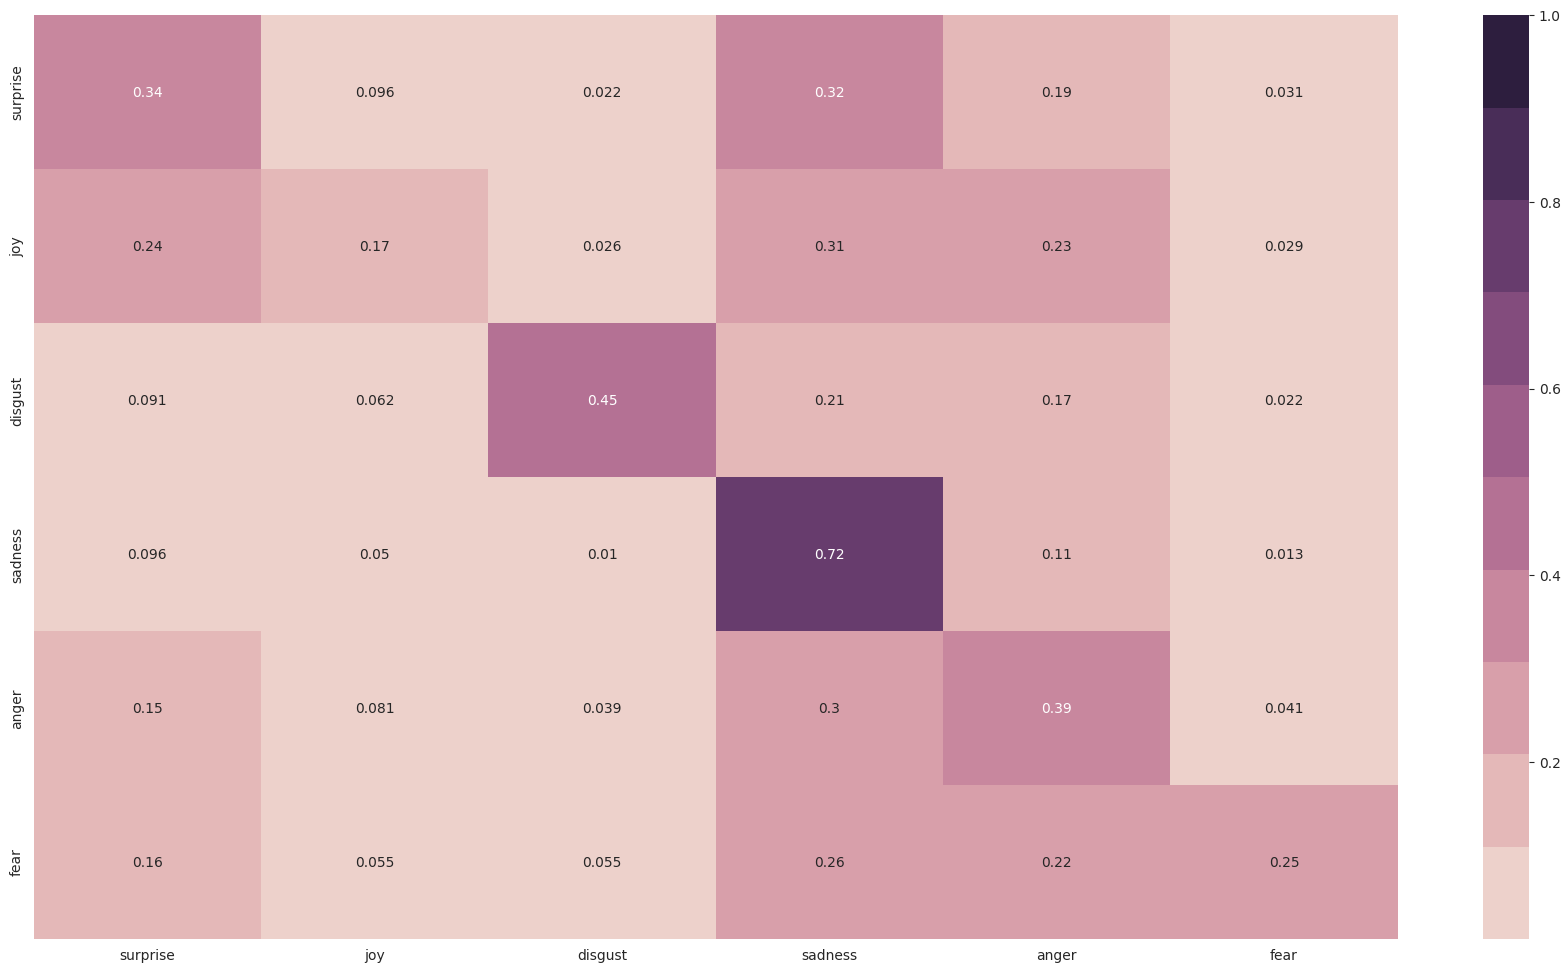

In [43]:
RFclassifer = RandomForestClassifier()
shapas = RFclassifer.fit(X_train, y_train)
y_pred = RFclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  